In [1]:
import timm
from fastai.vision.all import * 

In [2]:
path = Path('D:\ws\dldata\data\Tomato')

In [3]:
path.ls()

(#3) [Path('D:/ws/dldata/data/Tomato/test'),Path('D:/ws/dldata/data/Tomato/train'),Path('D:/ws/dldata/data/Tomato/valid')]

In [4]:
fns = get_image_files(path)
fns

(#22946) [Path('D:/ws/dldata/data/Tomato/test/TomatoEarlyBlight1.JPG'),Path('D:/ws/dldata/data/Tomato/test/TomatoEarlyBlight2.JPG'),Path('D:/ws/dldata/data/Tomato/test/TomatoEarlyBlight3.JPG'),Path('D:/ws/dldata/data/Tomato/test/TomatoEarlyBlight4.JPG'),Path('D:/ws/dldata/data/Tomato/test/TomatoEarlyBlight5.JPG'),Path('D:/ws/dldata/data/Tomato/test/TomatoEarlyBlight6.JPG'),Path('D:/ws/dldata/data/Tomato/test/TomatoHealthy1.JPG'),Path('D:/ws/dldata/data/Tomato/test/TomatoHealthy2.JPG'),Path('D:/ws/dldata/data/Tomato/test/TomatoHealthy3.JPG'),Path('D:/ws/dldata/data/Tomato/test/TomatoHealthy4.JPG')...]

In [5]:
tomato = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                  get_items=get_image_files, 
                  splitter=GrandparentSplitter(train_name='train', valid_name='valid'),
                  get_y=parent_label,
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))

In [6]:
dls = tomato.dataloaders(path, bs=8)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


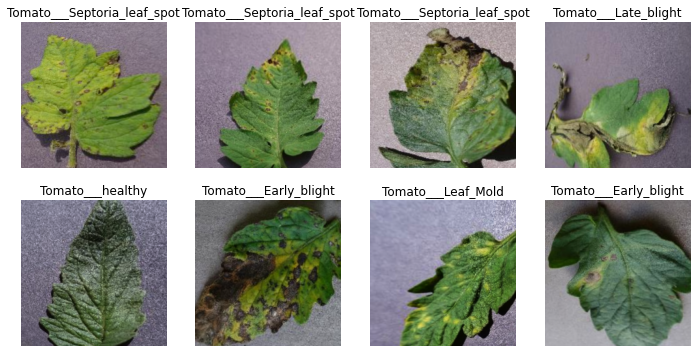

In [7]:
dls.show_batch()

In [12]:
learn = vision_learner(dls, 'resnet18', metrics=accuracy)

In [13]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.694289,0.354284,0.881134,29:52


epoch,train_loss,valid_loss,accuracy,time
0,0.485730,0.182221,0.935224,40:12
1,0.280283,0.104121,0.964449,40:38
2,0.303803,0.078900,0.973610,39:57
3,0.126845,0.063183,0.980807,39:40
4,0.151124,0.070181,0.977972,39:09


In [14]:
learn.export()

In [19]:
learn.save("tomato_models")

Path('models/tomato_models.pth')

In [18]:
learn.predict('D:/ws/dldata/data/Tomato/test/TomatoYellowCurlVirus6.JPG')

('Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 TensorBase(7),
 TensorBase([1.2810e-05, 6.6914e-05, 1.1222e-05, 2.6706e-07, 1.1947e-07, 3.1388e-07,
         1.3848e-06, 9.9978e-01, 4.6321e-05, 8.2441e-05]))

In [21]:
learn = load_learner('tomato_disease_1.pkl')

In [22]:
labels = learn.dls.vocab
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

In [25]:
import gradio as gr
gr.Interface(fn=predict, inputs=gr.inputs.Image(shape=(512, 512)), outputs=gr.outputs.Label(num_top_classes=10)).launch(share=True)

C:\Users\manir\anaconda3\envs\fastai\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\manir\anaconda3\envs\fastai\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7861/
Running on public URL: https://11854.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x27062d3b970>,
 'http://127.0.0.1:7861/',
 'https://11854.gradio.app')

Socket exception: An existing connection was forcibly closed by the remote host (10054)
Socket exception: An existing connection was forcibly closed by the remote host (10054)


In [ ]:
learn